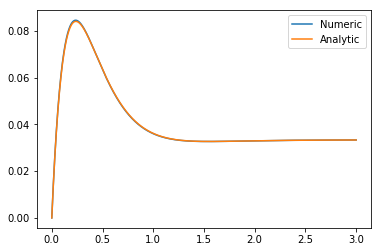

In [1]:
#!/usr/bin/env python

from __future__ import division

import numpy as np
import matplotlib.pylab as plt


def controllable_canonical_form(b, a):
    """ Determine the controllable canonical state space representation.

    b and a are numerator and denominator coefficients respectively,
    sorted in descending powers of s.

    The form used here is based on the document found at:
    http://www.engr.mun.ca/~millan/Eng6825/canonicals.pdf
    """
    
    n = len(a) - 1
    m = len(b) - 1

    # This routine will only work for proper systems (meaning higher power of s in denom than in numerator)
    assert n >= m

    # To treat the coefficient lists similarly, we add zeros as the
    # coefficients of the higher orders in the numerator
    b = list(np.zeros(n - m)) + b

    # We reverse the coefficients
    a_rev = np.atleast_2d(a[:0:-1])/a[0]
    b_rev = np.atleast_2d(b[:0:-1])/a[0]

    # We stack a column of zeros, the diagonal ones and the reversed
    # coefficients into A
    A = np.bmat([[np.zeros((n-1, 1)), np.eye(n-1)],
                  [-a_rev]])

    # B is zero with a one at the bottom
    B = np.asmatrix(np.zeros((n, 1)))
    B[-1, 0] = 1

    C = np.asmatrix(b_rev - a_rev*b[0]/a[0])

    D = np.asmatrix(b[0]/a[0])
    
    return A, B, C, D

b = [1, 3, 2]
a = [1, 12, 47, 60]

A, B, C, D = controllable_canonical_form(b, a)

# time points
Npoints = 1000
starttime = 0
endtime = 3
tspan = np.linspace(starttime, endtime, Npoints)
dt = tspan[1] - tspan[0]

Nstates = A.shape[1]
Noutputs = C.shape[0]

x = np.zeros((Nstates, 1))

yplot = np.zeros((Npoints, Noutputs))

# step response
u = 1

for i, t in enumerate(tspan):
    dxdt = A*x + B*u

    y = C*x + D*u

    # Euler integration
    x += dxdt*dt

    # store values
    yplot[i, :] = y

y_analytic = 1/30*np.exp(-5*tspan)*(45*np.exp(tspan)
                                    - 10*np.exp(2*tspan)
                                    + np.exp(5*tspan)
                                    - 36)
# plot result
plt.plot(tspan, yplot, label='Numeric')
plt.plot(tspan, y_analytic, label='Analytic')
plt.legend()
plt.show()

In [2]:
a


[1, 12, 47, 60]

In [11]:
x = np.arange(3.)
y = np.arange(3.)
z = np.array([x,y])

In [14]:
np.atleast_3d(z)

array([[[ 0.],
        [ 1.],
        [ 2.]],

       [[ 0.],
        [ 1.],
        [ 2.]]])

In [12]:
z

array([[ 0.,  1.,  2.],
       [ 0.,  1.,  2.]])

In [15]:
x

array([ 0.,  1.,  2.])

In [38]:
x[]

SyntaxError: invalid syntax (<ipython-input-38-6a9d6b6fb7c1>, line 1)

In [39]:
a

[1, 12, 47, 60]

In [41]:
a[:0:-1]

[60, 47, 12]

In [59]:
y=np.zeros((50,3))

In [65]:
y[1,:] = 1,2,3

In [64]:
y[1

array([ 0.,  0.,  0.])